# Load Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pathlib import Path

In [2]:
data_dir = Path('../data').resolve()
data_dir

PosixPath('/Volumes/GoogleDrive/My Drive/covid_data')

In [3]:
# Load all DNA SNPs into one dataframe
dna_snp_files = sorted((data_dir / 'dna_snp').glob('*.csv'))

dna_snp_df = pd.DataFrame()

for f in dna_snp_files:
    print(f.name)
    dna_snp_df = pd.concat([
        dna_snp_df,
        pd.read_csv(f)
    ], ignore_index=True)

dna_snp_df

gisaid_0101-0131_dna_snp.csv
gisaid_0201-0229_dna_snp.csv
gisaid_0301-0331_dna_snp.csv
gisaid_0401-0407_dna_snp.csv
gisaid_0408-0414_dna_snp.csv
gisaid_0415-0421_dna_snp.csv
gisaid_0422-0430_dna_snp.csv
gisaid_0501-0507_dna_snp.csv
gisaid_0508-0514_dna_snp.csv
gisaid_0515-0519_dna_snp.csv
gisaid_0520-0525_dna_snp.csv
gisaid_0526-0527_dna_snp.csv


,taxon,pos,ref,alt
0,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,8782,C,T
1,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,28144,T,C
2,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,29095,C,T
3,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,8782,C,T
4,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,9561,C,T
...,...,...,...,...
227262,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,14805,C,T
227263,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,25979,G,T
227264,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,28144,T,C
227265,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,28657,C,T


In [4]:
# Load all AA SNPs into one dataframe

data_dir = Path('../data').resolve()
aa_snp_files = sorted((data_dir / 'aa_snp').glob('*.csv'))

aa_snp_df = pd.DataFrame()

for f in aa_snp_files:
    print(f.name)
    aa_snp_df = pd.concat([
        aa_snp_df,
        pd.read_csv(f)
    ], ignore_index=True)

aa_snp_df

gisaid_0101-0131_aa_snp.csv
gisaid_0201-0229_aa_snp.csv
gisaid_0301-0331_aa_snp.csv
gisaid_0401-0407_aa_snp.csv
gisaid_0408-0414_aa_snp.csv
gisaid_0415-0421_aa_snp.csv
gisaid_0422-0430_aa_snp.csv
gisaid_0501-0507_aa_snp.csv
gisaid_0508-0514_aa_snp.csv
gisaid_0515-0519_aa_snp.csv
gisaid_0520-0525_aa_snp.csv
gisaid_0526-0527_aa_snp.csv


,taxon,gene,pos,ref,alt
0,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,ORF8,83,L,S
1,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF1a,3098,S,L
2,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF8,83,L,S
3,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF1a,427,S,N
4,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF8,61,V,L
...,...,...,...,...,...
138473,hCoV-19/Spain/COV000935/2020|EPI_ISL_452637|20...,N,196,S,L
138474,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF1a,3070,F,Y
138475,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF3a,195,G,V
138476,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF8,83,L,S


# SNP Frequency

Which SNPs are most common? Is the distribution bimodal and can we effectively partition real SNPs vs. sequencing/PCR errors?

In [5]:
snp_count_df = (
    aa_snp_df
    .groupby(['gene', 'pos', 'ref', 'alt'], as_index=False)
    .count()
    .rename(columns={'taxon': 'count'})
)
snp_count_df

,gene,pos,ref,alt,count
0,E,4,V,I,1
1,E,5,S,L,1
2,E,6,E,D,1
3,E,6,E,K,1
4,E,6,E,Q,1
...,...,...,...,...,...
11708,S,1264,L,P,1
11709,S,1265,K,R,2
11710,S,1272,T,I,3
11711,S,1273,_,*,17


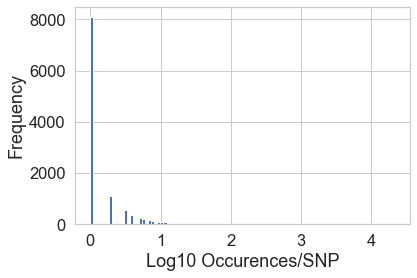

In [6]:
sns.set(style='whitegrid', font_scale=1.5)

fig, ax = plt.subplots(1, 1)

ax.hist(np.log10(snp_count_df['count']), bins=100)
ax.set_xlabel('Log10 Occurences/SNP')
ax.set_ylabel('Frequency')

plt.show()

Filtering out SNPs seen <= 3 times seems reasonable, that's the majority of the density here. We want to keep it relatively low since we want to be able to track rare or up-and-coming SNPs.

# Filter SNPs

Only take SNPs that occur 10 times or more

In [7]:
aa_snp_count_df = (
    aa_snp_df
    .groupby(['gene', 'pos', 'ref', 'alt'], as_index=False)
    .count()
    .rename(columns={'taxon': 'count'})
)

# Filter out SNPs
valid_aa_snps = (
    aa_snp_count_df
    .loc[aa_snp_count_df['count'] >= 10, :]
    .reset_index(drop=True)
    .sort_values('count', ascending=False)
)

# Create unique SNP string
valid_aa_snps['snp_str'] = (
    valid_aa_snps
    [['gene', 'pos', 'ref', 'alt']]
    .applymap(str)
    .agg('|'.join, axis=1)
)

valid_aa_snps

,gene,pos,ref,alt,count,snp_str
705,S,613,D,G,21712,S|613|D|G
423,ORF1b,313,P,L,21671,ORF1b|313|P|L
59,N,202,R,K,8002,N|202|R|K
61,N,203,G,R,7986,N|203|G|R
562,ORF3a,56,Q,H,6876,ORF3a|56|Q|H
...,...,...,...,...,...,...
222,ORF1a,1024,V,L,10,ORF1a|1024|V|L
667,S,77,R,M,10,S|77|R|M
666,S,76,K,M,10,S|76|K|M
559,ORF3a,52,L,F,10,ORF3a|52|L|F


In [9]:
dna_snp_count_df = (
    dna_snp_df
    .groupby(['pos', 'ref', 'alt'], as_index=False)
    .count()
    .rename(columns={'taxon': 'count'})
)

# Filter out SNPs
valid_dna_snps = (
    dna_snp_count_df
    .loc[dna_snp_count_df['count'] >= 10, :]
    .reset_index(drop=True)
    .sort_values('count', ascending=False)
)

# Create unique SNP string
valid_dna_snps['snp_str'] = (
    valid_dna_snps
    [['pos', 'ref', 'alt']]
    .applymap(str)
    .agg('|'.join, axis=1)
)

valid_dna_snps

,pos,ref,alt,count,snp_str
855,23403,A,G,21729,23403|A|G
560,14408,C,T,21689,14408|C|T
185,3037,C,T,21674,3037|C|T
54,241,C,T,21635,241|C|T
1174,28881,G,A,8003,28881|G|A
...,...,...,...,...,...
655,17565,T,C,10,17565|T|C
645,17285,C,T,10,17285|C|T
640,17122,G,T,10,17122|G|T
620,16466,C,T,10,16466|C|T


In [56]:
!ls

classify_clade_snps.ipynb       explore_snps2.ipynb
explore_snps.ipynb              process_pangolin_lineages.ipynb


In [57]:
# Save to disk
valid_dna_snps.to_csv('valid_dna_snps.csv', index=False)
valid_aa_snps.to_csv('valid_aa_snps.csv', index=False)

# Are some genes mutating more than others?

In [17]:
valid_aa_snps.groupby('gene', sort=False)['count'].sum()

gene
S        24675
ORF1b    29701
N        20030
ORF3a    12559
ORF1a    26644
ORF8      3882
M          952
ORF7a      324
ORF6       238
E          162
ORF7b       67
ORF10      151
Name: count, dtype: int64

For reference, gene sizes:

Gene | NT | AA
-----|----|---
ORF1a | 13203 | 4401
ORF1b | 8088 | 2696
S | 3822 | 1274
ORF3a | 828 | 276
E | 228 | 76
M | 669 | 223
ORF6 | 186 | 62
ORF7a | 366 | 122
ORF7b | 132 | 44
ORF8 | 366 | 122
N | 1260 | 420
ORF10 | 117 | 39

In [12]:
gene_df = pd.DataFrame({
    'gene': ['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF10'],
    'len_nt': [13203, 8088, 3822, 828, 228, 669, 186, 366, 132, 366, 1260, 117],
    'len_aa': [4401, 2696, 1274, 276, 76, 223, 62, 122, 44, 122, 420, 39]
}).set_index('gene')
gene_df

,len_nt,len_aa
gene,,
ORF1a,13203,4401
ORF1b,8088,2696
S,3822,1274
ORF3a,828,276
E,228,76
M,669,223
ORF6,186,62
ORF7a,366,122
ORF7b,132,44


Normalize by gene size:

In [21]:
print('SNPs per AA residue in gene')
valid_aa_snps.groupby('gene', sort=False)['count'].sum() / gene_df['len_aa']


SNPs per AA residue in gene


gene
E         2.131579
M         4.269058
N        47.690476
ORF10     3.871795
ORF1a     6.054079
ORF1b    11.016691
ORF3a    45.503623
ORF6      3.838710
ORF7a     2.655738
ORF7b     1.522727
ORF8     31.819672
S        19.368132
dtype: float64

## Now do this on the DNA level instead

In [28]:
gene_df = pd.DataFrame({
    'gene': ['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF10'],
    'len_nt': [13203, 8088, 3822, 828, 228, 669, 186, 366, 132, 366, 1260, 117],
    'len_aa': [4401, 2696, 1274, 276, 76, 223, 62, 122, 44, 122, 420, 39],
    # 1-indexed
    'start': [266, 13468, 21563, 25393, 26245, 26523, 27202, 27394, 27756, 27894, 28274, 29558],
    'end': [13468, 21555, 25384, 26220, 26472, 27191, 27387, 27759, 27887, 28259, 29533, 29674]
}).set_index('gene')
gene_df

,len_nt,len_aa,start,end
gene,,,,
ORF1a,13203,4401,266,13468
ORF1b,8088,2696,13468,21555
S,3822,1274,21563,25384
ORF3a,828,276,25393,26220
E,228,76,26245,26472
M,669,223,26523,27191
ORF6,186,62,27202,27387
ORF7a,366,122,27394,27759
ORF7b,132,44,27756,27887


In [25]:
# Classify DNA SNPs by gene
valid_dna_snps['gene'] = None
valid_dna_snps

,pos,ref,alt,count,snp_str,gene
855,23403,A,G,21729,23403|A|G,None
560,14408,C,T,21689,14408|C|T,None
185,3037,C,T,21674,3037|C|T,None
54,241,C,T,21635,241|C|T,None
1174,28881,G,A,8003,28881|G|A,None
...,...,...,...,...,...,...
655,17565,T,C,10,17565|T|C,None
645,17285,C,T,10,17285|C|T,None
640,17122,G,T,10,17122|G|T,None
620,16466,C,T,10,16466|C|T,None


In [31]:
for i, row in valid_dna_snps.iterrows():
    gene = gene_df.index.values[(gene_df['start'] <= row['pos']) & (gene_df['end'] >= row['pos'])]
    if len(gene) > 0:
        gene = gene[0]
    else:
        gene = None
    valid_dna_snps.loc[i, 'gene'] = gene
    
valid_dna_snps

,pos,ref,alt,count,snp_str,gene
855,23403,A,G,21729,23403|A|G,S
560,14408,C,T,21689,14408|C|T,ORF1b
185,3037,C,T,21674,3037|C|T,ORF1a
54,241,C,T,21635,241|C|T,None
1174,28881,G,A,8003,28881|G|A,N
...,...,...,...,...,...,...
655,17565,T,C,10,17565|T|C,ORF1b
645,17285,C,T,10,17285|C|T,ORF1b
640,17122,G,T,10,17122|G|T,ORF1b
620,16466,C,T,10,16466|C|T,ORF1b


In [32]:
valid_dna_snps.groupby('gene', sort=False)['count'].sum()

gene
S        27495
ORF1b    41465
ORF1a    54491
N        29645
ORF3a    13161
ORF8      3914
M         2005
ORF7a      540
ORF6       271
E          272
ORF10      231
ORF7b      130
Name: count, dtype: int64

In [33]:
print('SNPs per DNA residue in gene')
valid_dna_snps.groupby('gene', sort=False)['count'].sum() / gene_df['len_nt']

SNPs per DNA residue in gene


gene
E         1.192982
M         2.997010
N        23.527778
ORF10     1.974359
ORF1a     4.127168
ORF1b     5.126731
ORF3a    15.894928
ORF6      1.456989
ORF7a     1.475410
ORF7b     0.984848
ORF8     10.693989
S         7.193878
dtype: float64

## Synonymous vs. non-synonymous mutations

This will just be the dna_snp count - the aa_snp count

In [44]:
mut_df = pd.concat([
    valid_dna_snps.groupby('gene', sort=True)['count'].sum(), 
    valid_aa_snps.groupby('gene', sort=True)['count'].sum()
], axis=1)
# Rename columns
mut_df.columns = ['dna', 'non_synonymous']
# Take difference
mut_df['synonymous'] = mut_df['dna'] - mut_df['non_synonymous']

# Normalize diff by NT per gene
mut_df['non_synonymous_norm'] = mut_df['non_synonymous'] / gene_df['len_nt']
mut_df['synonymous_norm'] = mut_df['synonymous'] / gene_df['len_nt']

mut_df

,dna,non_synonymous,synonymous,non_synonymous_norm,synonymous_norm
gene,,,,,
E,272,162,110,0.710526,0.482456
M,2005,952,1053,1.423019,1.573991
N,29645,20030,9615,15.896825,7.630952
ORF10,231,151,80,1.290598,0.683761
ORF1a,54491,26644,27847,2.018026,2.109142
ORF1b,41465,29701,11764,3.672230,1.454500
ORF3a,13161,12559,602,15.167874,0.727053
ORF6,271,238,33,1.279570,0.177419
ORF7a,540,324,216,0.885246,0.590164


# SNP Grouping

Are there coherent groupings of SNPs? Can we effectively create "signatures" of SNPs and classify taxons into them? Or is it gonna be messier than that?

In [45]:
valid_aa_snps

,gene,pos,ref,alt,count,snp_str
705,S,613,D,G,21712,S|613|D|G
423,ORF1b,313,P,L,21671,ORF1b|313|P|L
59,N,202,R,K,8002,N|202|R|K
61,N,203,G,R,7986,N|203|G|R
562,ORF3a,56,Q,H,6876,ORF3a|56|Q|H
...,...,...,...,...,...,...
222,ORF1a,1024,V,L,10,ORF1a|1024|V|L
667,S,77,R,M,10,S|77|R|M
666,S,76,K,M,10,S|76|K|M
559,ORF3a,52,L,F,10,ORF3a|52|L|F


In [47]:
aa_snp_df['snp_str'] = aa_snp_df['gene'].str.cat([
    aa_snp_df['pos'].astype(str), 
    aa_snp_df['ref'],
    aa_snp_df['alt']
], sep='|')
aa_snp_df

,taxon,gene,pos,ref,alt,snp_str
0,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,ORF8,83,L,S,ORF8|83|L|S
1,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF1a,3098,S,L,ORF1a|3098|S|L
2,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF8,83,L,S,ORF8|83|L|S
3,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF1a,427,S,N,ORF1a|427|S|N
4,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF8,61,V,L,ORF8|61|V|L
...,...,...,...,...,...,...
138473,hCoV-19/Spain/COV000935/2020|EPI_ISL_452637|20...,N,196,S,L,N|196|S|L
138474,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF1a,3070,F,Y,ORF1a|3070|F|Y
138475,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF3a,195,G,V,ORF3a|195|G|V
138476,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF8,83,L,S,ORF8|83|L|S


In [49]:
aa_snp_filt_df = aa_snp_df.loc[
    aa_snp_df['snp_str'].isin(valid_aa_snps['snp_str']),
    :
].reset_index(drop=True)
aa_snp_filt_df

,taxon,gene,pos,ref,alt,snp_str
0,hCoV-19/Shenzhen/HKU-SZ-002/2020|EPI_ISL_40603...,ORF8,83,L,S,ORF8|83|L|S
1,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF1a,3098,S,L,ORF1a|3098|S|L
2,hCoV-19/Shenzhen/HKU-SZ-005/2020|EPI_ISL_40583...,ORF8,83,L,S,ORF8|83|L|S
3,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF8,61,V,L,ORF8|61|V|L
4,hCoV-19/USA/CA1/2020|EPI_ISL_406034|2020-01-23,ORF8,83,L,S,ORF8|83|L|S
...,...,...,...,...,...,...
119380,hCoV-19/Spain/COV000935/2020|EPI_ISL_452637|20...,N,196,S,L,N|196|S|L
119381,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF1a,3070,F,Y,ORF1a|3070|F|Y
119382,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF3a,195,G,V,ORF3a|195|G|V
119383,hCoV-19/Spain/COV000934/2020|EPI_ISL_452638|20...,ORF8,83,L,S,ORF8|83|L|S


In [50]:
# Group by taxon and make a ';' delimited list of snp_strs
aa_snp_filt_group_df = aa_snp_filt_df.groupby('taxon')['snp_str'].agg(';'.join).reset_index()
aa_snp_filt_group_df

,taxon,snp_str
0,hCoV-10/Canada/AB5/2020|EPI_ISL_435347|2020-04,ORF1b|313|P|L;S|613|D|G;ORF3a|13|T|I
1,hCoV-19/Algeria/G0638_2264/2020|EPI_ISL_418241...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
2,hCoV-19/Algeria/G0640_2265/2020|EPI_ISL_418242...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
3,hCoV-19/Algeria/G0860_2262/2020|EPI_ISL_420037...,ORF1a|264|T|I;ORF1a|1821|T|I;ORF1b|313|P|L;S|6...
4,hCoV-19/Anhui/SZ005/2020|EPI_ISL_413485|2020-0...,ORF1a|641|L|F;ORF1a|3605|L|F;ORF8|83|L|S
...,...,...
29700,hCoV-19/Xinyu/JX124/2020|EPI_ISL_421260|2020-0...,ORF1a|377|V|I;ORF1a|3605|L|F
29701,hCoV-19/Yunnan/IVDC-YN-003/2020|EPI_ISL_408480...,ORF1a|3605|L|F;ORF8|83|L|S
29702,hCov-19/Canada/AG1/2020|EPI_ISL_435344|2020-04,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
29703,hCov-19/Canada/AG6/2020|EPI_ISL_435343|2020-04,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...


In [54]:
# Count occurences of SNP signatures and plot
aa_snp_sig_count_df = aa_snp_filt_group_df.groupby('snp_str').count().sort_values('taxon', ascending=False)
aa_snp_sig_count_df

,taxon
snp_str,
ORF1b|313|P|L;S|613|D|G;N|202|R|K;N|203|G|R,3508
ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56|Q|H,2575
ORF1b|313|P|L;S|613|D|G,2401
ORF1b|1426|P|L;ORF1b|1463|Y|C;ORF8|83|L|S,873
ORF1a|738|I|V;ORF1a|764|P|S;ORF1a|3605|L|F;ORF3a|250|G|V,704
...,...
ORF1a|3324|S|Y;ORF1b|313|P|L;S|613|D|G,1
ORF1a|3324|S|Y;ORF1b|313|P|L;S|613|D|G;E|70|P|L;M|2|D|G,1
ORF1a|3324|S|Y;ORF1b|313|P|L;S|613|D|G;N|80|D|Y,1


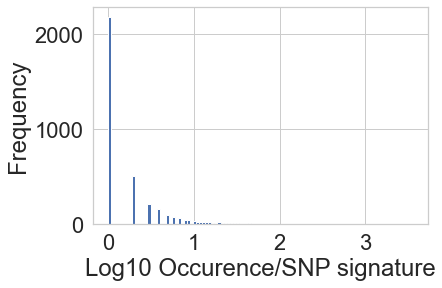

In [55]:
sns.set(style='whitegrid', font_scale=2)

fig, ax = plt.subplots(1, 1)

ax.hist(np.log10(aa_snp_sig_count_df['taxon']), bins=100)
ax.set_xlabel('Log10 Occurence/SNP signature')
ax.set_ylabel('Frequency')

plt.show()

## Assign AA SNP signatures

In [80]:
# Only take SNP signatures with >= 10 sequences

valid_aa_snp_sigs = aa_snp_sig_count_df.index.values[aa_snp_sig_count_df['taxon'] >= 10]
len(valid_aa_snp_sigs)

347

In [81]:
valid_aa_snp_sigs

array(['ORF1b|313|P|L;S|613|D|G;N|202|R|K;N|203|G|R',
       'ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56|Q|H',
       'ORF1b|313|P|L;S|613|D|G',
       'ORF1b|1426|P|L;ORF1b|1463|Y|C;ORF8|83|L|S',
       'ORF1a|738|I|V;ORF1a|764|P|S;ORF1a|3605|L|F;ORF3a|250|G|V',
       'ORF1b|313|P|L;S|613|D|G;ORF3a|56|Q|H',
       'ORF1a|3605|L|F;ORF3a|250|G|V', 'ORF1a|446|N|K;ORF1a|447|D|N',
       'ORF1b|313|P|L;S|613|D|G;M|174|T|M;N|202|R|K;N|203|G|R',
       'ORF1a|3070|F|Y;ORF3a|195|G|V;ORF8|83|L|S;N|196|S|L',
       'ORF1a|3277|G|S;ORF1b|313|P|L;S|613|D|G;N|102|D|Y;N|202|R|K;N|203|G|R',
       'ORF8|83|L|S',
       'ORF1a|1245|T|I;ORF1a|3277|G|S;ORF1b|313|P|L;S|613|D|G;N|202|R|K;N|203|G|R',
       'ORF1b|313|P|L;ORF1b|940|A|V;S|613|D|G;ORF3a|12|V|L',
       'ORF1b|313|P|L;S|613|D|G;N|193|S|L',
       'ORF1b|313|P|L;S|613|D|G;ORF3a|12|V|L',
       'ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56|Q|H;ORF8|23|S|L',
       'ORF1a|264|T|I;ORF1a|3883|S|L;ORF1b|313|P|L;ORF1b|1843|A|V;S|613|D|G;ORF3

In [82]:
valid_aa_snp_sigs_explode = [set(s.split(';')) for s in valid_aa_snp_sigs]
valid_aa_snp_sigs_explode

[{'N|202|R|K', 'N|203|G|R', 'ORF1b|313|P|L', 'S|613|D|G'},
 {'ORF1a|264|T|I', 'ORF1b|313|P|L', 'ORF3a|56|Q|H', 'S|613|D|G'},
 {'ORF1b|313|P|L', 'S|613|D|G'},
 {'ORF1b|1426|P|L', 'ORF1b|1463|Y|C', 'ORF8|83|L|S'},
 {'ORF1a|3605|L|F', 'ORF1a|738|I|V', 'ORF1a|764|P|S', 'ORF3a|250|G|V'},
 {'ORF1b|313|P|L', 'ORF3a|56|Q|H', 'S|613|D|G'},
 {'ORF1a|3605|L|F', 'ORF3a|250|G|V'},
 {'ORF1a|446|N|K', 'ORF1a|447|D|N'},
 {'M|174|T|M', 'N|202|R|K', 'N|203|G|R', 'ORF1b|313|P|L', 'S|613|D|G'},
 {'N|196|S|L', 'ORF1a|3070|F|Y', 'ORF3a|195|G|V', 'ORF8|83|L|S'},
 {'N|102|D|Y',
  'N|202|R|K',
  'N|203|G|R',
  'ORF1a|3277|G|S',
  'ORF1b|313|P|L',
  'S|613|D|G'},
 {'ORF8|83|L|S'},
 {'N|202|R|K',
  'N|203|G|R',
  'ORF1a|1245|T|I',
  'ORF1a|3277|G|S',
  'ORF1b|313|P|L',
  'S|613|D|G'},
 {'ORF1b|313|P|L', 'ORF1b|940|A|V', 'ORF3a|12|V|L', 'S|613|D|G'},
 {'N|193|S|L', 'ORF1b|313|P|L', 'S|613|D|G'},
 {'ORF1b|313|P|L', 'ORF3a|12|V|L', 'S|613|D|G'},
 {'ORF1a|264|T|I',
  'ORF1b|313|P|L',
  'ORF3a|56|Q|H',
  'ORF8|23|S|L

In [83]:
# Assign taxon's that don't already fit perfectly into a group, to a group

aa_snp_filt_group_df['snp_sig'] = None

for i, row in aa_snp_filt_group_df.iterrows():
    # Testing
    #if i > 1:
    #    break
    
    # Check to see if its snp_str is already valid
    if row['snp_str'] in valid_aa_snp_sigs:
        # print('Exact match')
        row['snp_sig'] = row['snp_str']
        continue
    
    # print('No match')
    
    # Otherwise compute the "hamming distance" between this snp_str and
    # all valid snp_strs
    scores = [len(a & set(row['snp_str'].split(';'))) for a in valid_aa_snp_sigs_explode]
    # And take the snp_sig with the largest score.
    # This isn't perfect. since argmax() takes the FIRST largest value if the largest
    # value occurs more than once. idk what the best way to do this is... if we see
    # a lot of split assignments then we should really merge the signatures that they're split
    # between.
    row['snp_sig'] = valid_aa_snp_sigs[np.argmax(scores)]
    
aa_snp_filt_group_df

,taxon,snp_str,snp_sig
0,hCoV-10/Canada/AB5/2020|EPI_ISL_435347|2020-04,ORF1b|313|P|L;S|613|D|G;ORF3a|13|T|I,ORF1b|313|P|L;S|613|D|G;ORF3a|13|T|I
1,hCoV-19/Algeria/G0638_2264/2020|EPI_ISL_418241...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...,ORF1a|264|T|I;ORF1a|270|P|S;ORF1b|313|P|L;S|61...
2,hCoV-19/Algeria/G0640_2265/2020|EPI_ISL_418242...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
3,hCoV-19/Algeria/G0860_2262/2020|EPI_ISL_420037...,ORF1a|264|T|I;ORF1a|1821|T|I;ORF1b|313|P|L;S|6...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
4,hCoV-19/Anhui/SZ005/2020|EPI_ISL_413485|2020-0...,ORF1a|641|L|F;ORF1a|3605|L|F;ORF8|83|L|S,ORF1a|3605|L|F;ORF1b|1426|P|L;ORF1b|1463|Y|C;O...
...,...,...,...
29700,hCoV-19/Xinyu/JX124/2020|EPI_ISL_421260|2020-0...,ORF1a|377|V|I;ORF1a|3605|L|F,ORF1a|377|V|I;ORF1a|3605|L|F
29701,hCoV-19/Yunnan/IVDC-YN-003/2020|EPI_ISL_408480...,ORF1a|3605|L|F;ORF8|83|L|S,ORF1a|3605|L|F;ORF1b|1426|P|L;ORF1b|1463|Y|C;O...
29702,hCov-19/Canada/AG1/2020|EPI_ISL_435344|2020-04,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...
29703,hCov-19/Canada/AG6/2020|EPI_ISL_435343|2020-04,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...


## Analyze AA SNP signatures

In [96]:
# How many sequences per signature?
aa_snp_sig_counts = (
    pd.DataFrame(
        aa_snp_filt_group_df
        .groupby('snp_sig')['taxon']
        .count()
        .sort_values(ascending=False)
    )
    .reset_index()
)
aa_snp_sig_counts['snps'] = aa_snp_sig_counts['snp_sig'].str.split(';')
aa_snp_sig_counts

,snp_sig,taxon,snps
0,ORF1b|313|P|L;S|613|D|G;N|202|R|K;N|203|G|R,4987,"[ORF1b|313|P|L, S|613|D|G, N|202|R|K, N|203|G|R]"
1,ORF1a|264|T|I;ORF1b|313|P|L;S|613|D|G;ORF3a|56...,3335,"[ORF1a|264|T|I, ORF1b|313|P|L, S|613|D|G, ORF3..."
2,ORF1b|313|P|L;S|613|D|G,2401,"[ORF1b|313|P|L, S|613|D|G]"
3,ORF1a|738|I|V;ORF1a|764|P|S;ORF1a|3605|L|F;ORF...,1216,"[ORF1a|738|I|V, ORF1a|764|P|S, ORF1a|3605|L|F,..."
4,ORF1b|1426|P|L;ORF1b|1463|Y|C;ORF8|83|L|S,1171,"[ORF1b|1426|P|L, ORF1b|1463|Y|C, ORF8|83|L|S]"
5,ORF1b|313|P|L;S|613|D|G;ORF3a|56|Q|H,621,"[ORF1b|313|P|L, S|613|D|G, ORF3a|56|Q|H]"
6,ORF1a|3605|L|F;ORF3a|250|G|V,492,"[ORF1a|3605|L|F, ORF3a|250|G|V]"
7,ORF1a|446|N|K;ORF1a|447|D|N,439,"[ORF1a|446|N|K, ORF1a|447|D|N]"
8,ORF1b|313|P|L;S|613|D|G;M|174|T|M;N|202|R|K;N|...,405,"[ORF1b|313|P|L, S|613|D|G, M|174|T|M, N|202|R|..."
9,ORF1b|313|P|L;ORF1b|940|A|V;S|613|D|G;ORF3a|12...,389,"[ORF1b|313|P|L, ORF1b|940|A|V, S|613|D|G, ORF3..."


In [97]:
# Save to disk
aa_snp_sig_counts.to_csv('aa_snp_sig_counts.csv', index=False)

## Are there any indels? on the AA level

In [101]:
np.sum(aa_snp_sig_counts['snp_sig'].str.contains('\|\|'))

0

In [102]:
np.sum(aa_snp_sig_counts['snp_sig'].str.contains('\|\;'))

0

I don't think so... I can probably condense the SNP formatting then. Like gene|refposalt. S|D614G

# SNP Frequencies, per Gene

Are some genes enriched for mutations that only pop up once?

In [104]:
aa_snp_count_df

,gene,pos,ref,alt,count
0,E,4,V,I,1
1,E,5,S,L,1
2,E,6,E,D,1
3,E,6,E,K,1
4,E,6,E,Q,1
...,...,...,...,...,...
11708,S,1264,L,P,1
11709,S,1265,K,R,2
11710,S,1272,T,I,3
11711,S,1273,_,*,17


In [108]:
gene_df.index.values

array(['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b',
       'ORF8', 'N', 'ORF10'], dtype=object)

In [138]:
aa_snp_count_df.loc[
    (aa_snp_count_df['gene'] == 'S') &
    (aa_snp_count_df['pos'] == 613),
    :
]

,gene,pos,ref,alt,count
11138,S,613,D,G,21712
11139,S,613,D,N,5
11140,S,613,G,R,1


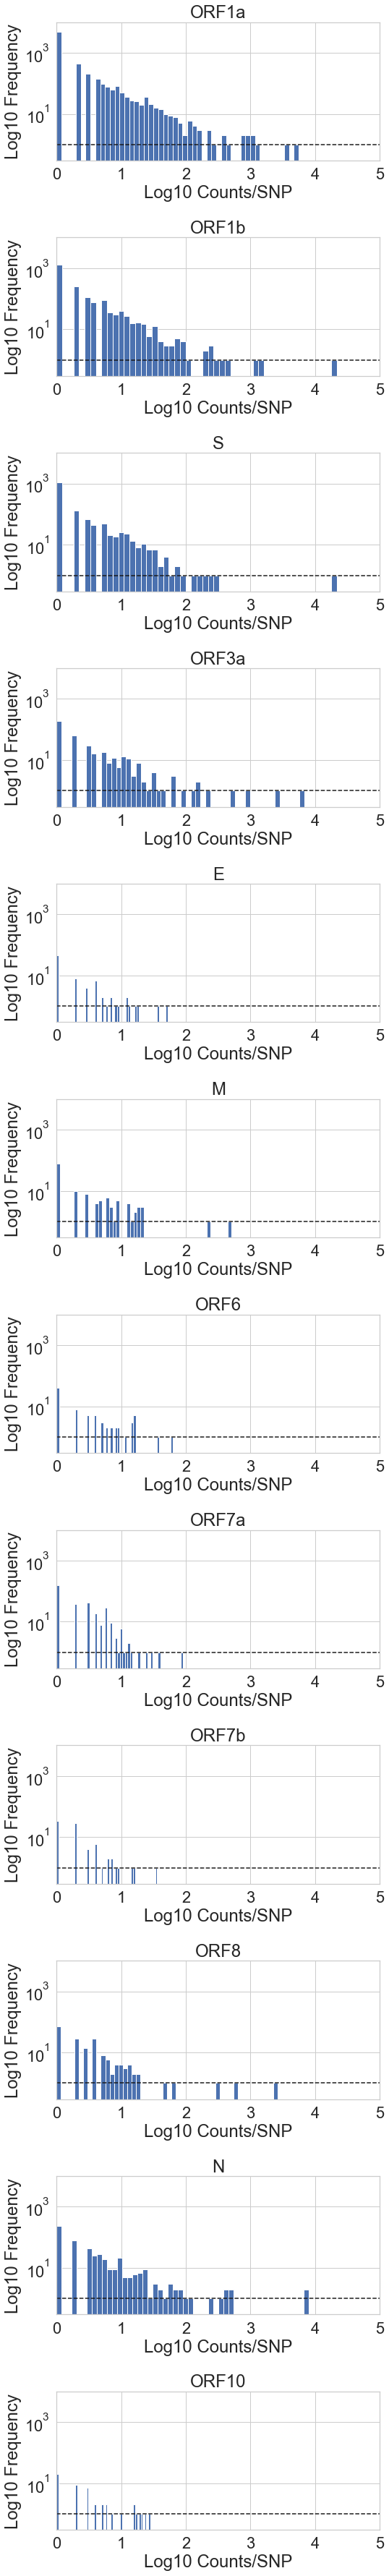

In [143]:
sns.set(style='whitegrid', font_scale=2)

fig, axes = plt.subplots(len(gene_df.index.values), 1)
fig.set_size_inches(8, 50)
for i, gene in enumerate(gene_df.index.values):
    # Get all SNPs for this gene
    gene_snps = aa_snp_count_df.loc[aa_snp_count_df['gene'] == gene, :]
    # Plot the log10 histogram of counts
    
    ax = axes[i]
    ax.hist(np.log10(gene_snps['count']), bins=50)
    ax.plot([0, 5], [1, 1], '--k', scalex=False, scaley=False)
    ax.set_xlim([0, 5])
    ax.set_yscale('log', nonposy='clip')
    ax.set_ylim([0.3, 1e4])
    ax.set_xlabel('Log10 Counts/SNP')
    ax.set_ylabel('Log10 Frequency')
    ax.set_title(gene)

plt.tight_layout()
plt.show()

This viz sucks. trying again

In [144]:
aa_snp_count_df

,gene,pos,ref,alt,count
0,E,4,V,I,1
1,E,5,S,L,1
2,E,6,E,D,1
3,E,6,E,K,1
4,E,6,E,Q,1
...,...,...,...,...,...
11708,S,1264,L,P,1
11709,S,1265,K,R,2
11710,S,1272,T,I,3
11711,S,1273,_,*,17


In [150]:
a = (
    aa_snp_count_df.groupby(['gene', 'count'], as_index=False)
    ['pos']
    .count()
    .rename(columns={'pos': 'freq'})
)
a

,gene,count,freq
0,E,1,47
1,E,2,8
2,E,3,4
3,E,4,7
4,E,5,2
5,E,6,1
6,E,7,2
7,E,8,1
8,E,9,1
9,E,12,2


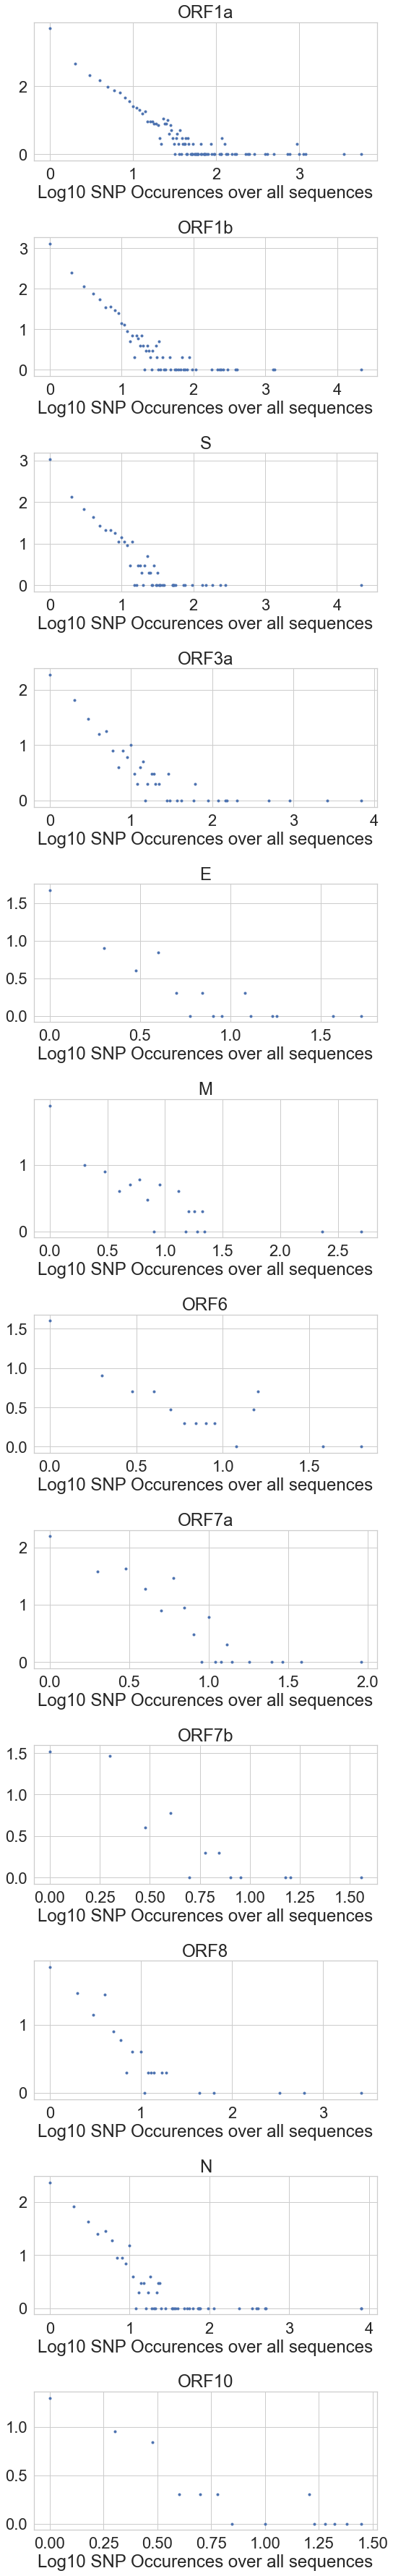

In [155]:
sns.set(style='whitegrid', font_scale=2)

fig, axes = plt.subplots(len(gene_df.index.values), 1)
fig.set_size_inches(8, 50)
for i, gene in enumerate(gene_df.index.values):
    # Get all SNPs for this gene
    b = a.loc[a['gene'] == gene, :]
    # Plot the log10 histogram of counts
    
    ax = axes[i]
    ax.plot(np.log10(b['count']), np.log10(b['freq']), '.b')
    ax.set_title(gene)
    ax.set_xlabel('Log10 SNP Occurences over all sequences')

plt.tight_layout()
plt.show()

In [154]:
gene_df

,len_nt,len_aa,start,end
gene,,,,
ORF1a,13203,4401,266,13468
ORF1b,8088,2696,13468,21555
S,3822,1274,21563,25384
ORF3a,828,276,25393,26220
E,228,76,26245,26472
M,669,223,26523,27191
ORF6,186,62,27202,27387
ORF7a,366,122,27394,27759
ORF7b,132,44,27756,27887


## By position over genes

In [160]:
a = aa_snp_count_df.groupby(['gene', 'pos'], as_index=False)['count'].sum()
a

,gene,pos,count
0,E,4,1
1,E,5,1
2,E,6,3
3,E,8,9
4,E,9,2
...,...,...,...
6974,S,1263,9
6975,S,1264,1
6976,S,1265,2
6977,S,1272,3


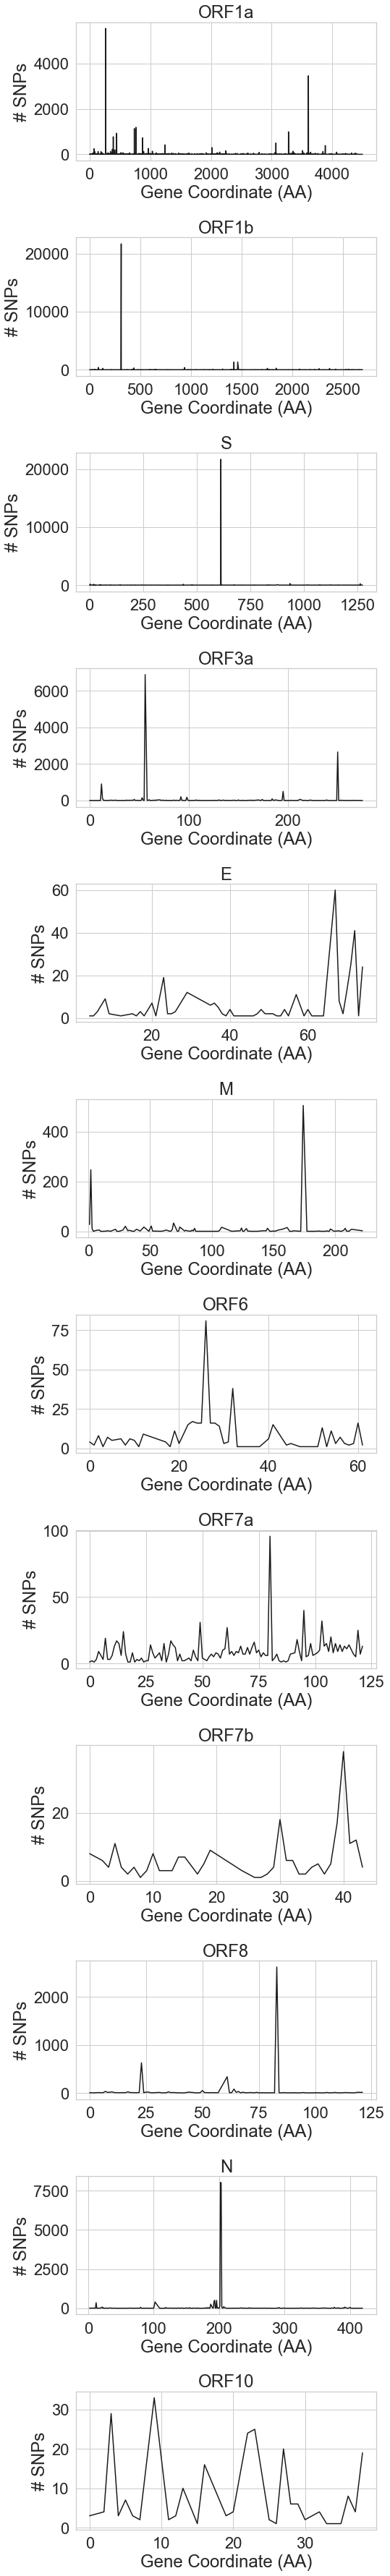

In [163]:
sns.set(style='whitegrid', font_scale=2)

fig, axes = plt.subplots(len(gene_df.index.values), 1)
fig.set_size_inches(8, 50)
for i, gene in enumerate(gene_df.index.values):
    # Get all SNPs for this gene
    b = a.loc[a['gene'] == gene, :]
    # Plot the log10 histogram of counts
    
    ax = axes[i]
    ax.plot(b['pos'], b['count'], '-k')
    ax.set_title(gene)
    ax.set_xlabel('Gene Coordinate (AA)')
    ax.set_ylabel('# SNPs')

plt.tight_layout()
plt.show()

In [166]:
a = aa_snp_count_df.groupby(['gene', 'pos', 'alt'], as_index=False)['count'].sum()
a

,gene,pos,alt,count
0,E,4,I,1
1,E,5,L,1
2,E,6,D,1
3,E,6,K,1
4,E,6,Q,1
...,...,...,...,...
11514,S,1264,P,1
11515,S,1265,R,2
11516,S,1272,I,3
11517,S,1273,*,17


In [175]:
aa_map = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '*', '_']
def aa_to_int(aa):
    return aa_map.index(aa)

aa_to_int('K')

8

In [ ]:
a.loc[:, 'alt'] = a['alt'].apply(aa_to_int)

In [225]:
b = a.loc[a['gene'] == 'E', :]
b

,gene,pos,alt,count
0,E,4,7,1
1,E,5,9,1
2,E,6,2,1
3,E,6,8,1
4,E,6,13,1
5,E,8,7,9
6,E,9,1,1
7,E,9,17,1
8,E,12,17,1
9,E,15,11,2


In [226]:
# Create matrix
mat = np.zeros((len(aa_map) + 1, np.max(b['pos']) + 1))
mat.shape

(23, 75)

In [227]:
for i, row in b.iterrows():
    mat[row['alt'], row['pos']] = row['count']
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [229]:
# Filter out cols with nothing
keep_cols = np.sum(mat, axis=0) > 0
mat = mat[:, keep_cols]
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

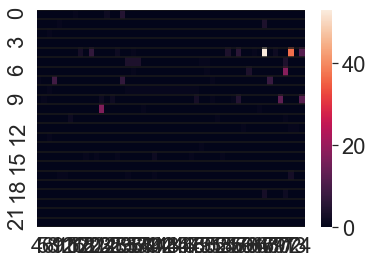

In [238]:
fig, ax = plt.subplots(1, 1)
sns.heatmap(mat, ax=ax)
ax.hlines(np.arange(0, mat.shape[1]), *ax.get_xlim())
ax.set_xticks(np.arange(0, mat.shape[1]))
ax.set_xticklabels(np.where(keep_cols)[0])
plt.show()

In [213]:
# Now scale to all genes....
a = aa_snp_count_df.groupby(['gene', 'pos', 'alt'], as_index=False)['count'].sum()
a.loc[:, 'alt'] = a['alt'].apply(aa_to_int)
a

,gene,pos,alt,count
0,E,4,7,1
1,E,5,9,1
2,E,6,2,1
3,E,6,8,1
4,E,6,13,1
...,...,...,...,...
11514,S,1264,12,1
11515,S,1265,14,2
11516,S,1272,7,3
11517,S,1273,20,17


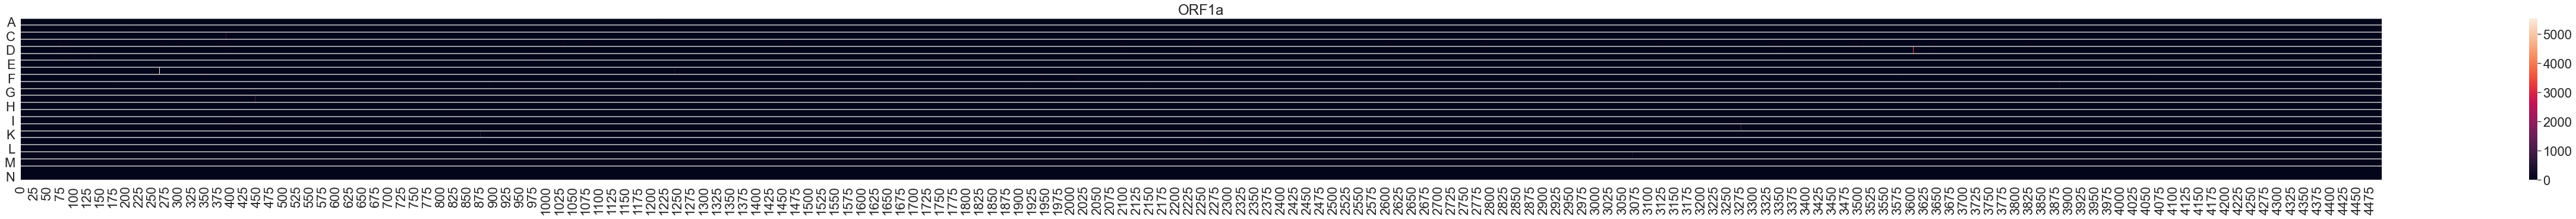

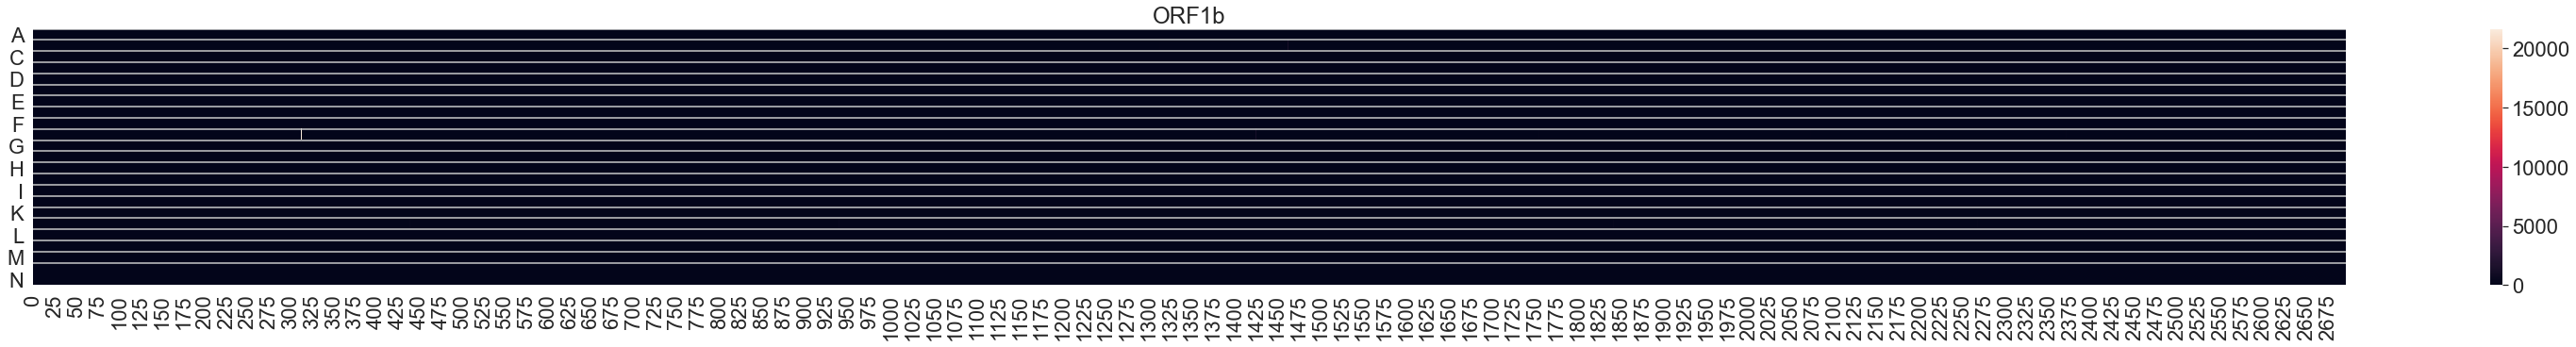

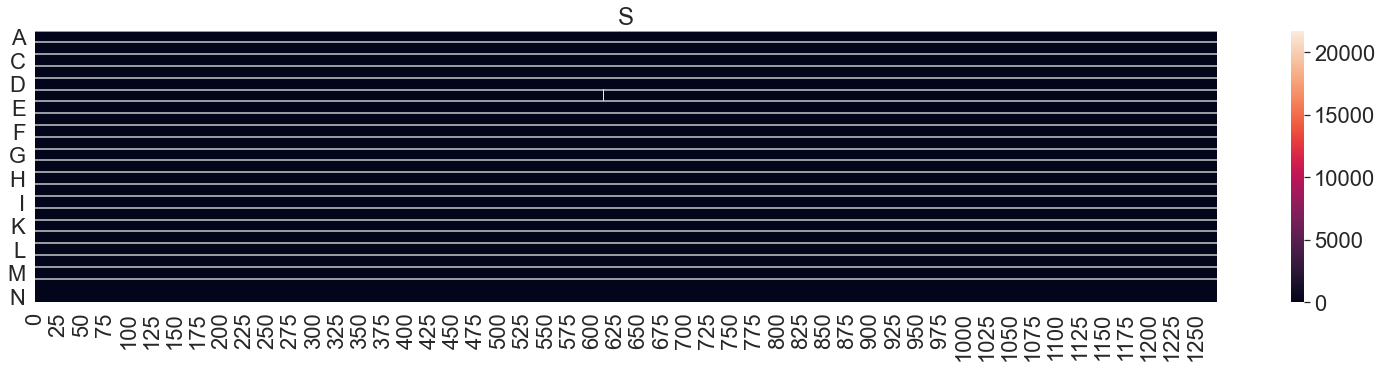

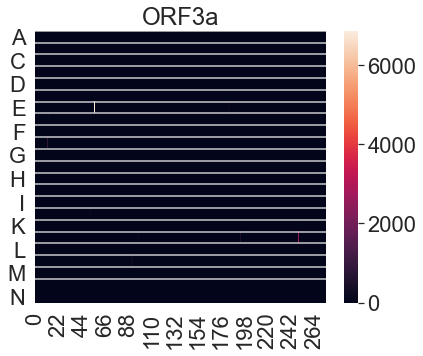

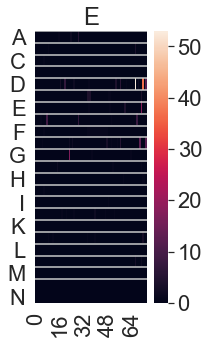

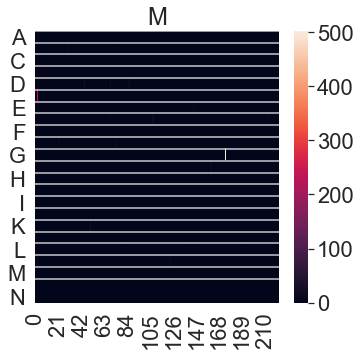

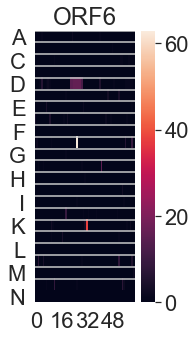

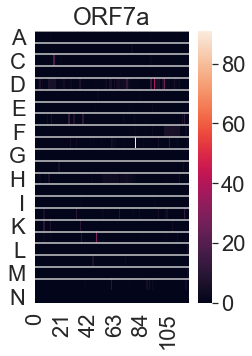

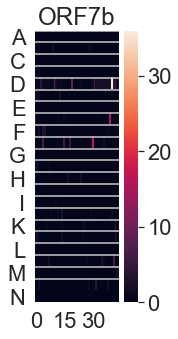

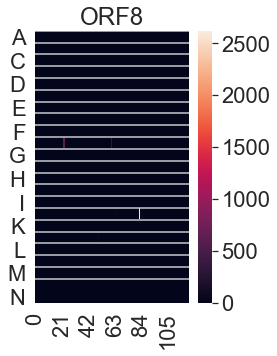

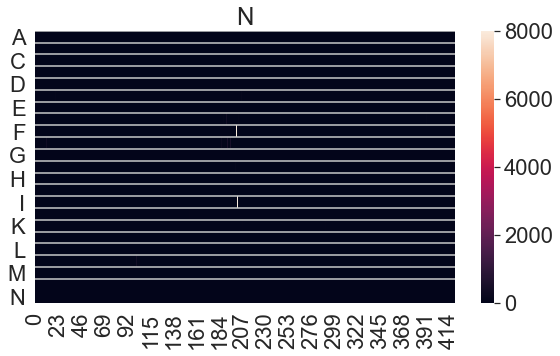

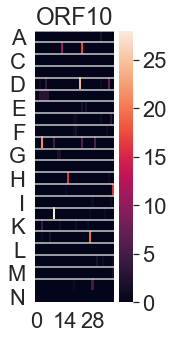

In [224]:
sns.set(style='white', font_scale=2)

for i, gene in enumerate(gene_df.index.values):
    b = a.loc[a['gene'] == gene, :]
    
    gene_len = gene_df.loc[gene, 'len_aa']
    
    # Create matrix
    mat = np.zeros((len(aa_map) + 1, np.max(b['pos']) + 1))
    
    for i, row in b.iterrows():
        mat[row['alt'], row['pos']] = row['count']
    
    fig, ax = plt.subplots(1, 1)
    ppi = 50
    fig.set_size_inches(1 + (gene_len / ppi), 5)
    
    sns.heatmap(mat, ax=ax)
    ax.set_title(gene)
    ax.hlines(np.arange(0, len(aa_map)), *ax.get_xlim(), colors='#CCC')
    ax.set_yticklabels(aa_map)
    plt.show()
    
    